# Imports:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### Read in the data:

In [3]:
book_tags = pd.read_csv('../ignore/book_tags.csv')
books = pd.read_csv('../ignore/books.csv')
ratings = pd.read_csv('../ignore/ratings.csv')
tags = pd.read_csv('../ignore/tags.csv')
to_read = pd.read_csv('../ignore/to_read.csv')

### Explore Book Tags:

In [4]:
book_tags.head()

,goodreads_book_id,tag_id,count
0,1,30574,167697
1,1,11305,37174
2,1,11557,34173
3,1,8717,12986
4,1,33114,12716


- goodreads_book_id and best_book_id generally point to the most popular edition of a given book
- tag_id are tags/shelves/genres assigned by users to books

In [5]:
book_tags.shape

(999912, 3)

- almost 1,000,000 tags!

In [6]:
book_tags.value_counts().count()

999906

- 999906 unique tags

### Explore Books:

In [7]:
books.head()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,"The Hunger Games (The Hunger Games, #1)",eng,4.34,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,Harry Potter and the Sorcerer's Stone (Harry P...,eng,4.44,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,"Twilight (Twilight, #1)",en-US,3.57,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,To Kill a Mockingbird,eng,4.25,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,The Great Gatsby,eng,3.89,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [8]:
books.shape

(10000, 23)

- These are the top 10,000 most popular books on Good Reads

In [9]:
books.authors.value_counts().count()

4664

- 4,664 unique authors

Let's look at the top 10 authors

In [10]:
authors = pd.DataFrame(books.authors.value_counts())
authors = authors.head(10)
authors

,authors
Stephen King,60
Nora Roberts,59
Dean Koontz,47
Terry Pratchett,42
Agatha Christie,39
Meg Cabot,37
James Patterson,36
David Baldacci,34
J.D. Robb,33
John Grisham,33


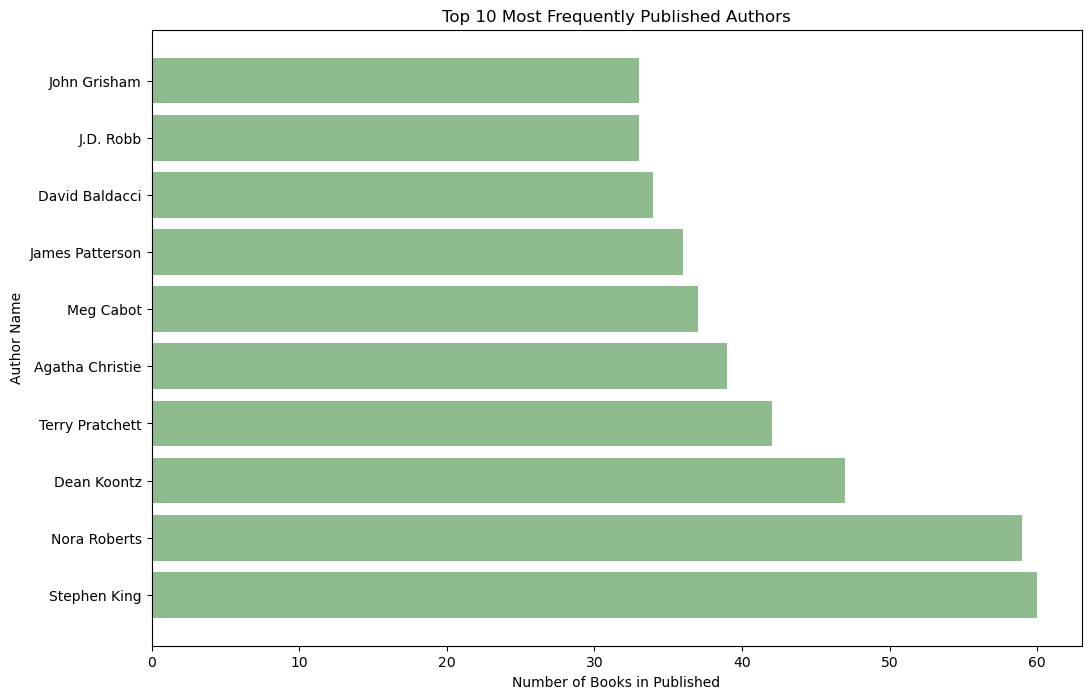

In [11]:
plt.figure(figsize=(12,8))
plt.barh(y = authors.index, width= authors.authors, color = 'darkseagreen')
plt.xlabel('Number of Books in Published')
plt.ylabel('Author Name')
plt.title('Top 10 Most Frequently Published Authors');

# plt.savefig('Top 10 Most Frequently Published Authors.png')

In [12]:
books.title.value_counts().count()

9964

- 9,964 unique book titles.

Let's look at the duplicated titles

In [13]:
books.loc[books.title.duplicated() == True]

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
1291,1292,5413,5413,40802405,22,385516487,9.780386e+12,"Stephen King, Jerry N. Uelsmann",2005.0,'Salem's Lot The Illustrated Edition,'Salem's Lot,eng,4.25,72797,74725,482,460,1854,12040,24920,35451,https://images.gr-assets.com/books/1320478491m...,https://images.gr-assets.com/books/1320478491s...
2400,2401,22571540,22571540,42038027,68,525953507,9.780526e+12,Harlan Coben,2015.0,The Stranger,The Stranger,eng,3.85,32333,43269,3807,659,2378,10895,18136,11201,https://images.gr-assets.com/books/1408564426m...,https://images.gr-assets.com/books/1408564426s...
3801,3802,922991,922991,2248317,87,755309510,9.780755e+12,Victoria Hislop,2005.0,The Island,The Island,en-GB,3.99,23415,26842,2022,529,1435,5310,9997,9571,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
3911,3912,2071575,2071575,2076822,33,670018856,9.780670e+12,Jane Green,2008.0,The Beach House,The Beach House,en-US,3.62,25412,27219,2316,582,2456,9103,9733,5345,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
4211,4212,19101283,19101283,24342394,78,385351372,9.780385e+12,"Jo Nesbø, Charlotte Barslund",2014.0,Sønnen,The Son,eng,4.07,19393,25476,2270,355,834,4359,11025,8903,https://images.gr-assets.com/books/1390177620m...,https://images.gr-assets.com/books/1390177620s...
4270,4271,13235,13235,6542114,6,517220776,9.780517e+12,Lewis Carroll,1884.0,Complete Works of Lewis Carroll,The Complete Stories and Poems,NaN,4.34,23390,23417,30,236,586,3104,6495,12996,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
4374,4375,1031461,1031461,1017724,11,590416022,9.780590e+12,"Ann McGovern, Winslow Pinney Pels, Winslow Pin...",1971.0,Stone Soup,Stone Soup,en-US,4.28,25518,25537,184,189,680,4348,6994,13326,https://images.gr-assets.com/books/1360057986m...,https://images.gr-assets.com/books/1360057986s...
4938,4939,22904,22904,568437,70,805210555,9.780805e+12,"Franz Kafka, Nahum N. Glatzer, John Updike, Wi...",1946.0,Sämtliche Erzählungen,The Complete Stories,eng,4.34,18314,20541,485,201,454,2373,6549,10964,https://images.gr-assets.com/books/1223588017m...,https://images.gr-assets.com/books/1223588017s...
5173,5174,18668066,18668066,26493730,52,399171088,9.780399e+12,Nora Roberts,2014.0,The Collector,The Collector,eng,3.92,15888,22703,1931,386,1330,5357,8363,7267,https://images.gr-assets.com/books/1389532018m...,https://images.gr-assets.com/books/1389532018s...
5267,5268,327242,327242,317880,5,078948045X,6.355171e+11,Sarah Simblet,2001.0,Anatomy for the Artist,Anatomy for the Artist,en-US,3.97,17000,17050,49,767,1255,3413,3978,7637,https://images.gr-assets.com/books/1309295064m...,https://images.gr-assets.com/books/1309295064s...


In [14]:
books.loc[books.title == 'Pinocchio']

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
1995,1996,180617,180617,2685281,1032,140382623,9.780140e+12,"Carlo Collodi, John Boyne, Monteiro Lobato, Un...",1883.0,Le avventure di Pinocchio,Pinocchio,eng,3.86,48961,55985,1405,1235,4063,14916,17113,18658,https://images.gr-assets.com/books/1327938097m...,https://images.gr-assets.com/books/1327938097s...
9119,9120,533675,533675,521194,4,307021858,9.780307e+12,"Eugene Bradley Coco, Ron Dias",1992.0,Pinocchio (A Little Golden Book),Pinocchio,NaN,4.33,10615,10627,25,130,358,1704,2158,6277,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...


- These dublicates have the same title but different Authors

In [15]:
earliest_year = books.original_publication_year.min()
newest_year = books.original_publication_year.max()


print(earliest_year)
print(newest_year)

-1750.0
2017.0


In [16]:
lang = pd.DataFrame(books.language_code.value_counts())
lang = lang.head(10)
lang

,language_code
eng,6341
en-US,2070
en-GB,257
ara,64
en-CA,58
fre,25
ind,21
spa,20
ger,13
per,7


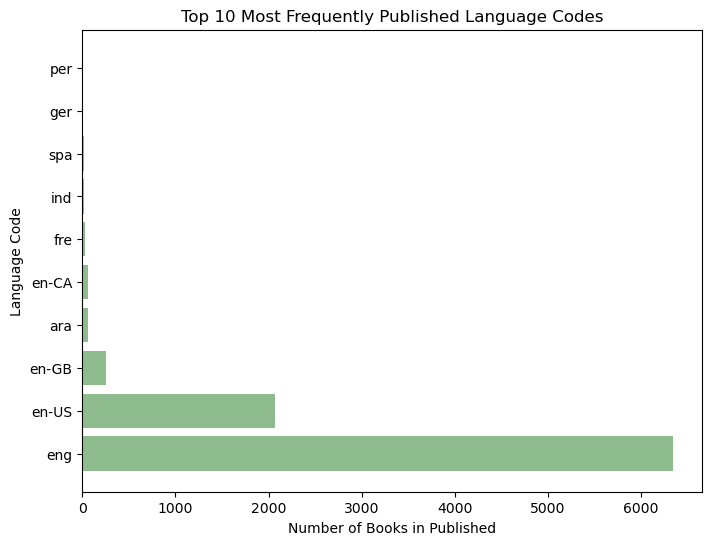

In [17]:
plt.figure(figsize=(8,6))
plt.barh(y = lang.index, width= lang.language_code, color = 'darkseagreen')
plt.xlabel('Number of Books in Published')
plt.ylabel('Language Code')
plt.title('Top 10 Most Frequently Published Language Codes');

# plt.savefig('Top 10 Most Frequently Published Language Codes.png')

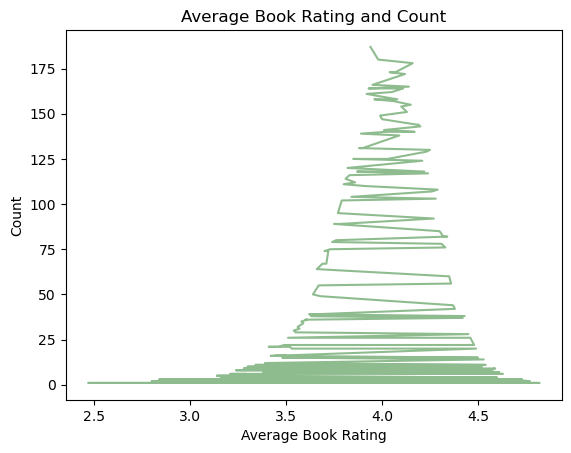

In [18]:
plt.plot(books.average_rating.value_counts(), color = 'darkseagreen')
plt.xlabel('Average Book Rating')
plt.ylabel('Count')
plt.title('Average Book Rating and Count');

# plt.savefig('silly_sorting_hat.png')

In [19]:
ratings = books[['ratings_1', 'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5']]
ratings = pd.DataFrame(ratings.sum())
ratings

,0
ratings_1,13450406
ratings_2,31108850
ratings_3,114758938
ratings_4,199656966
ratings_5,237898056


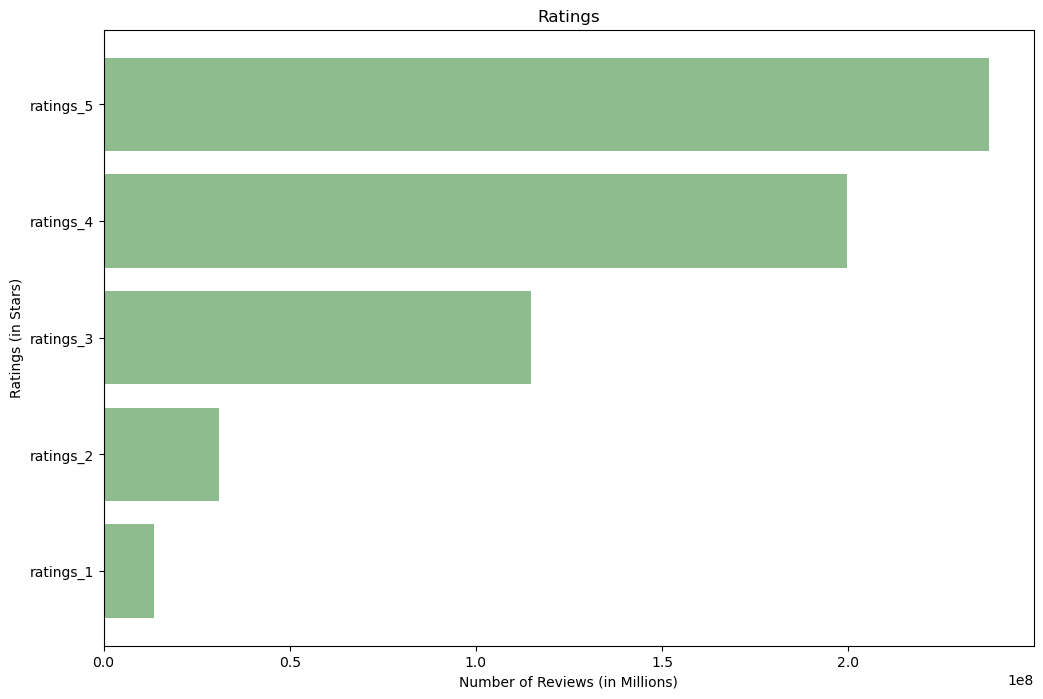

In [20]:
plt.figure(figsize=(12,8))
plt.barh(width= ratings[0], y = ratings.index, color = 'darkseagreen')
plt.xlabel('Number of Reviews (in Millions)')
plt.ylabel('Ratings (in Stars)')
plt.title('Ratings');

# plt.savefig('Ratings_Distribution.png')

### Explore Tags:

In [21]:
tags.head()

,tag_id,tag_name
0,0,-
1,1,--1-
2,2,--10-
3,3,--12-
4,4,--122-


In [22]:
tags.tail(10)

,tag_id,tag_name
34242,34242,漫画
34243,34243,골든
34244,34244,﹏moonplus-reader﹏
34245,34245,ﺭﺿﻮﻯ-عاشور
34246,34246,ﻳﻮﺳﻒ-زيدان
34247,34247,Ｃhildrens
34248,34248,Ｆａｖｏｒｉｔｅｓ
34249,34249,Ｍａｎｇａ
34250,34250,ＳＥＲＩＥＳ
34251,34251,ｆａｖｏｕｒｉｔｅｓ


In [23]:
tags.tag_name.value_counts().count()

34252

- 34,252 unique tags

In [24]:
to_read.head()

,user_id,book_id
0,9,8
1,15,398
2,15,275
3,37,7173
4,34,380


#### Now, let's do some EDA on the new df created in the cleaning process:

##### Read in the data:

In [25]:
books_new_df = pd.read_csv('../data/books_for_binary_classification.csv')
tbr = pd.read_csv('../data/tbr_list.csv')

In [26]:
books_new_df.head()

,isbn,authors,original_publication_year,title,average_rating,ratings_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,should_i_read
0,439023483,Suzanne Collins,2008.0,"The Hunger Games (The Hunger Games, #1)",4.34,4780653,66715,127936,560092,1481305,2706317,1
1,439554934,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Sorcerer's Stone (Harry P...,4.44,4602479,75504,101676,455024,1156318,3011543,1
2,316015849,Stephenie Meyer,2005.0,"Twilight (Twilight, #1)",3.57,3866839,456191,436802,793319,875073,1355439,0
3,61120081,Harper Lee,1960.0,To Kill a Mockingbird,4.25,3198671,60427,117415,446835,1001952,1714267,1
4,743273567,F. Scott Fitzgerald,1925.0,The Great Gatsby,3.89,2683664,86236,197621,606158,936012,947718,0


In [27]:
read = books_new_df.should_i_read.value_counts()
read

1    4128
0    3723
Name: should_i_read, dtype: int64

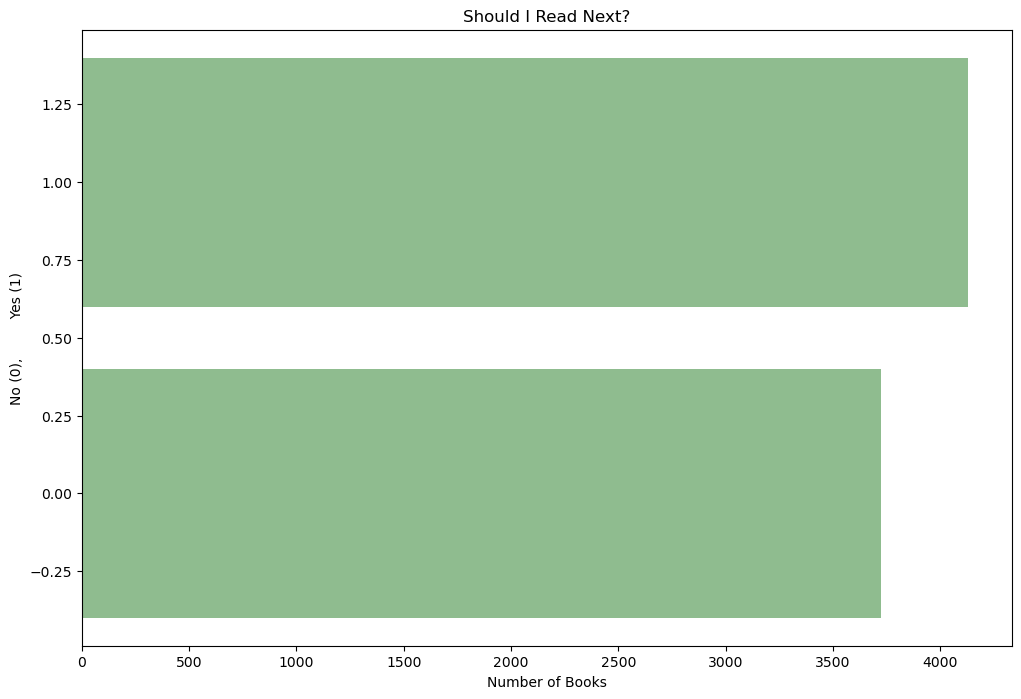

In [28]:
plt.figure(figsize=(12,8))
plt.barh(y = read.index, width= read, color = 'darkseagreen')
plt.xlabel('Number of Books')
plt.ylabel('No (0),         Yes (1)')
plt.title('Should I Read Next?');

# plt.savefig('Should_i_read_next_Distribution.png')

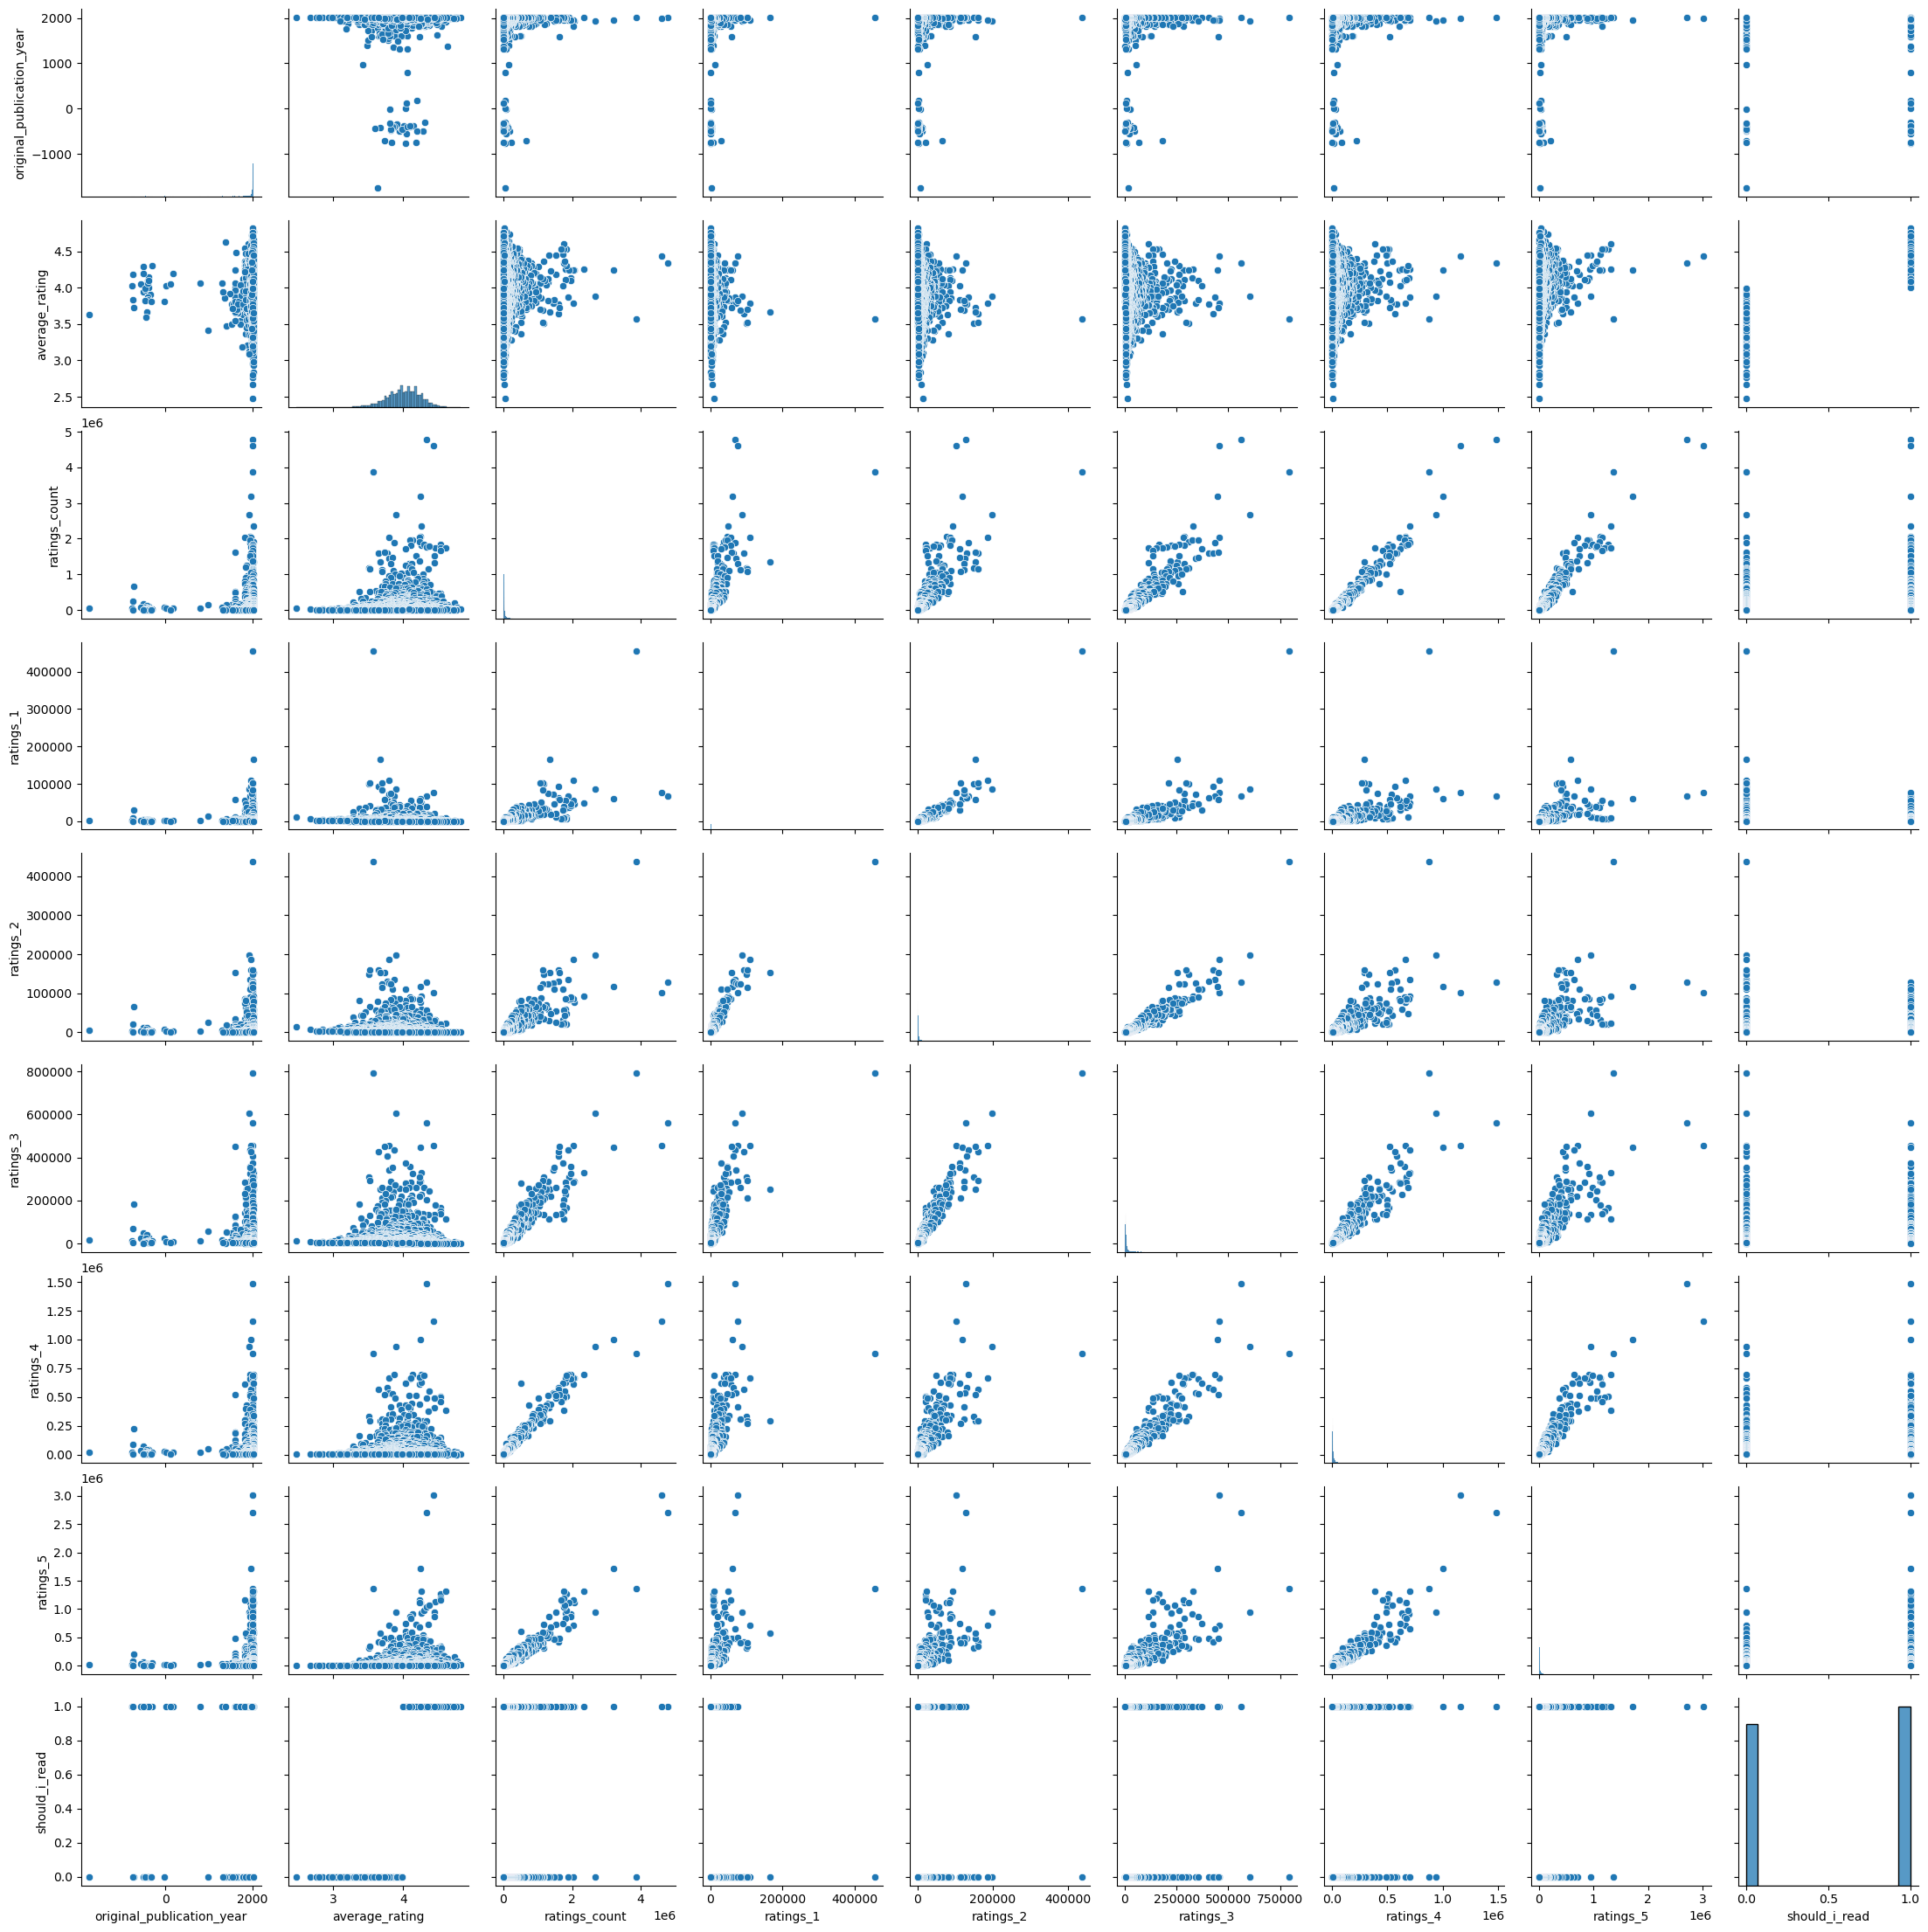

In [29]:
sns.pairplot(books_new_df);

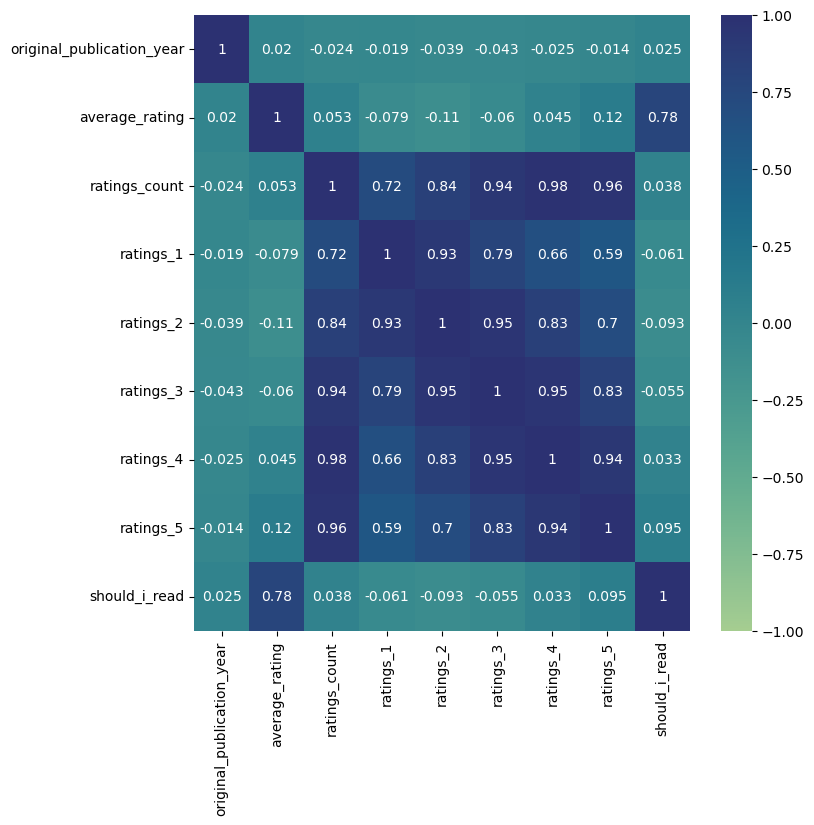

In [30]:
plt.figure(figsize=(8,8))
sns.heatmap(books_new_df.corr(numeric_only=True), annot=True, cmap='crest', vmin= -1, vmax= 1);

# plt.savefig('books_heat_map.png')

In [31]:
authors_and_titles = books_new_df[['authors', 'title']]
authors_and_titles.head()

,authors,title
0,Suzanne Collins,"The Hunger Games (The Hunger Games, #1)"
1,"J.K. Rowling, Mary GrandPré",Harry Potter and the Sorcerer's Stone (Harry P...
2,Stephenie Meyer,"Twilight (Twilight, #1)"
3,Harper Lee,To Kill a Mockingbird
4,F. Scott Fitzgerald,The Great Gatsby


In [32]:
authors_and_titles['title_length'] = authors_and_titles['title'].apply(len)
authors_and_titles['title_word_count'] = authors_and_titles['title'].str.split().str.len()

authors_and_titles['author_length'] = authors_and_titles['authors'].apply(len)
authors_and_titles.head()

/var/folders/w4/lpzl5f8j3kx7kch0q9wglx4c0000gn/T/ipykernel_85690/2237530514.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  authors_and_titles['title_length'] = authors_and_titles['title'].apply(len)
/var/folders/w4/lpzl5f8j3kx7kch0q9wglx4c0000gn/T/ipykernel_85690/2237530514.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  authors_and_titles['title_word_count'] = authors_and_titles['title'].str.split().str.len()
/var/folders/w4/lpzl5f8j3kx7kch0q9wglx4c0000gn/T/ipykernel_85690/2237530514.py:4: Setting

,authors,title,title_length,title_word_count,author_length
0,Suzanne Collins,"The Hunger Games (The Hunger Games, #1)",39,7,15
1,"J.K. Rowling, Mary GrandPré",Harry Potter and the Sorcerer's Stone (Harry P...,56,9,27
2,Stephenie Meyer,"Twilight (Twilight, #1)",23,3,15
3,Harper Lee,To Kill a Mockingbird,21,4,10
4,F. Scott Fitzgerald,The Great Gatsby,16,3,19


In [33]:
print(authors_and_titles.title_length.mean().round())
print(authors_and_titles.title_word_count.mean().round())
print(authors_and_titles.author_length.mean().round())

32.0
6.0
19.0


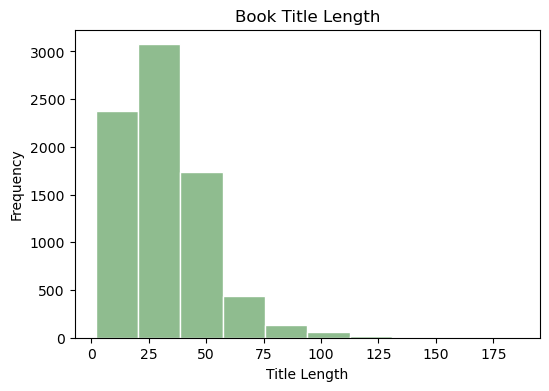

In [34]:
plt.figure(figsize= (6,4))
plt.hist(authors_and_titles['title_length'], bins = 10, color = 'darkseagreen', edgecolor = 'white')
plt.xlabel('Title Length')
plt.ylabel('Frequency')
plt.title('Book Title Length');

# plt.savefig('book_title_length.png')

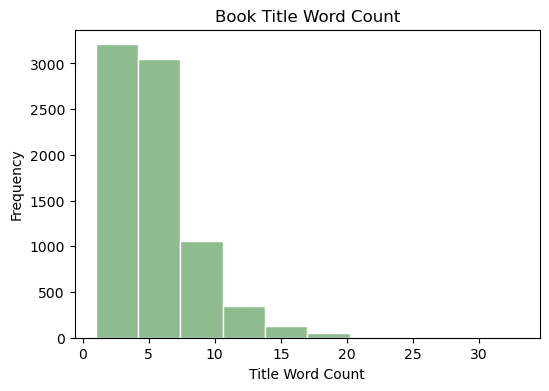

In [35]:
plt.figure(figsize= (6,4))
plt.hist(authors_and_titles['title_word_count'], bins = 10, color = 'darkseagreen', edgecolor = 'white')
plt.xlabel('Title Word Count')
plt.ylabel('Frequency')
plt.title('Book Title Word Count');

# plt.savefig('book_title_word_count.png')

In [36]:
authors_and_titles.sort_values(by='title_length', ascending=False).head()

,authors,title,title_length,title_word_count,author_length
5697,"Simon Kuper, Stefan Szymanski","Soccernomics: Why England Loses, Why Germany a...",186,29,29
3271,Jen Lancaster,"Bright Lights, Big Ass: A Self-Indulgent, Surl...",174,33,13
4022,"Robert Henri, Forbes Watson, Margery A. Ryerson","The Art Spirit: Notes, Articles, Fragments of ...",165,27,47
2075,Jen Lancaster,Bitter Is the New Black: Confessions of a Cond...,163,25,13
658,Julie Powell,"Julie and Julia: 365 Days, 524 Recipes, 1 Tiny...",151,28,12


In [37]:
authors_and_titles.sort_values(by='title_word_count', ascending=False).head()

,authors,title,title_length,title_word_count,author_length
3271,Jen Lancaster,"Bright Lights, Big Ass: A Self-Indulgent, Surl...",174,33,13
5697,"Simon Kuper, Stefan Szymanski","Soccernomics: Why England Loses, Why Germany a...",186,29,29
658,Julie Powell,"Julie and Julia: 365 Days, 524 Recipes, 1 Tiny...",151,28,12
4022,"Robert Henri, Forbes Watson, Margery A. Ryerson","The Art Spirit: Notes, Articles, Fragments of ...",165,27,47
893,Gretchen Rubin,The Happiness Project: Or Why I Spent a Year T...,150,27,14


In [38]:
authors_and_titles.sort_values(by='author_length', ascending=False).head()

,authors,title,title_length,title_word_count,author_length
5111,"Christopher Hitchens, Titus Lucretius Carus, O...",The Portable Atheist: Essential Readings for t...,60,8,742
4501,"John Joseph Adams, Robert J. Sawyer, Stephen K...",The Improbable Adventures of Sherlock Holmes,44,6,451
4956,"Bryan Konietzko, Michael Dante DiMartino, Aaro...",Avatar: The Last Airbender: The Lost Adventures,47,7,360
7445,"George R.R. Martin, Gardner R. Dozois, Joe Abe...",Rogues,6,1,348
6464,"Lauren Henderson, Chris Manby, Sarah Mlynowski...",Girls' Night In,15,3,307


In [39]:
authors_and_titles.head()

,authors,title,title_length,title_word_count,author_length
0,Suzanne Collins,"The Hunger Games (The Hunger Games, #1)",39,7,15
1,"J.K. Rowling, Mary GrandPré",Harry Potter and the Sorcerer's Stone (Harry P...,56,9,27
2,Stephenie Meyer,"Twilight (Twilight, #1)",23,3,15
3,Harper Lee,To Kill a Mockingbird,21,4,10
4,F. Scott Fitzgerald,The Great Gatsby,16,3,19


In [40]:
X = authors_and_titles['title']

In [41]:
tfid = TfidfVectorizer(stop_words='english')
tfid.fit(X)

TfidfVectorizer(stop_words='english')

In [42]:
X = tfid.transform(X)

In [43]:
X_df = pd.DataFrame(X.todense(), columns=tfid.get_feature_names_out())

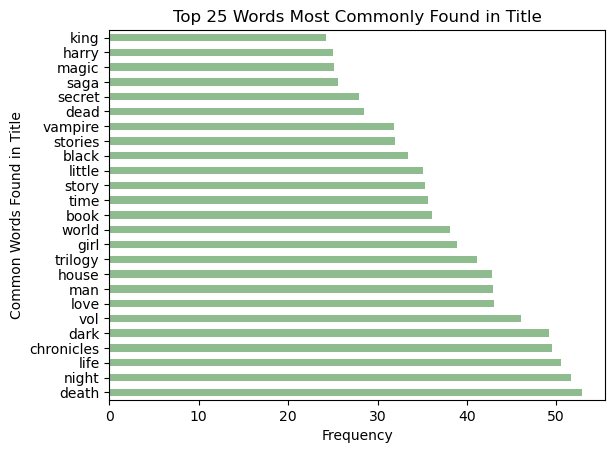

In [44]:
X_df.sum().sort_values(ascending = False).head(25).plot(kind = 'barh', color = 'darkseagreen')
plt.xlabel('Frequency')
plt.ylabel('Common Words Found in Title')
plt.title('Top 25 Words Most Commonly Found in Title');

# plt.savefig('top_25_most_common_words_in_titles.png')

In [45]:
X = authors_and_titles['title']

In [46]:
tfid = TfidfVectorizer(stop_words='english', ngram_range=(3,3))
tfid.fit(X)

TfidfVectorizer(ngram_range=(3, 3), stop_words='english')

In [47]:
X = tfid.transform(X)

In [48]:
X_df = pd.DataFrame(X.todense(), columns=tfid.get_feature_names_out())

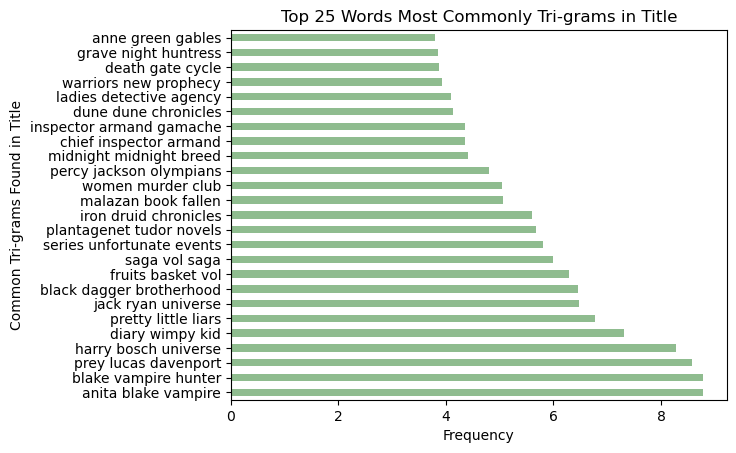

In [49]:
X_df.sum().sort_values(ascending = False).head(25).plot(kind = 'barh', color = 'darkseagreen');
plt.xlabel('Frequency')
plt.ylabel('Common Tri-grams Found in Title')
plt.title('Top 25 Words Most Commonly Tri-grams in Title');


# plt.savefig('top_25_most_common_tri_grams_in_titles.png')